# Tarea 13
## Ecuaciones diferenciales y sistemas dinámicos

__Ejercicio 1: Resolver oscilador amortiguado__
$$m \ddot x=-k x -b \dot x,$$
usando $m=k=b=1$ y $x_0=1$, $\dot x_0=0$.
Usen Euler Y Runge-Kutta orden 4, comparen las soluciones, es decir, grafiquen el espacio de fase para cada método y despues juntos.
__Nota:__ El método de Runge-Kutta esta dentro de la familia de métodos simplécticos, es decir, preserva el volumen en el espacio de fase, algo particularmente útil cuanto tenemos sistemas que conservan la energia, a diferencia de _Euler_ que no lo hace. Observen que al no haber cantidades conservadas para el oscilador amortiguado, Euler funcione mucho mejor que en el otro caso, pues el oscilador amortiguado no conserva el volumen del espacio de fase.

In [3]:
function euler(f,list,x0) #Definimos la funcion de Euler (Independiente de la dimension del sistema) por la aproximacion dada por el profesor.
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t = i*h
        x = x + f(x,t)*h
        push!(listx,x) 
     end
     return listx
end

euler (generic function with 1 method)

In [1]:
function rungeKutta(f,list,x0) #De igual forma con Runge-Kutta de orden 4.
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t = i*h
        k1 = f(x,t)
        k2 = f(x+(h/2)*k1,t+(h/2))
        k3 = f(x+(h/2)*k2, t+(h/2))
        k4 = f(x+h*k3, t+h);
        x = x+(h/6)*(k1+2*k2+2*k3+k4)
        push!(listx,x) 
     end
     return listx
end

rungeKutta (generic function with 1 method)

In [5]:
f(x,t)=[x[2], -1.0*x[1]-1.0*x[2]] #Definimos la función con k=1 y m=1.

f (generic function with 1 method)

In [7]:
list=0:0.1:15 #Se tomara el intervalo [0,15] con h = 0.1

vecEuler=euler(f,list,[1,0]) #En vecEuler se guardan las soluciones con Euler y se dan como condiciones iniciales x(0)=1 y u(0)=0

vecRK=rungeKutta(f,list,[1,0]) #En vecRK se guardan las soluciones con Runge-Kutta y se dan como condiciones iniciales x(0)=1 y u(0)=0

151-element Array{Any,1}:
 [1,0]                     
 [0.995167,-0.0950042]     
 [0.981331,-0.180064]      
 [0.959481,-0.255318]      
 [0.930587,-0.320982]      
 [0.895595,-0.377346]      
 [0.855417,-0.424758]      
 [0.810928,-0.463619]      
 [0.762963,-0.494374]      
 [0.712308,-0.517502]      
 [0.6597,-0.533508]        
 [0.605826,-0.542918]      
 [0.551319,-0.54627]       
 ⋮                         
 [0.000548664,0.000558267] 
 [0.000599049,0.000450405] 
 [0.000638944,0.000348526] 
 [0.000668967,0.000253028] 
 [0.000689773,0.000164211] 
 [0.00070204,8.22855e-5]   
 [0.000706464,7.3736e-6]   
 [0.00070375,-6.04796e-5]  
 [0.000694603,-0.000121301]
 [0.000679721,-0.00017518] 
 [0.000659793,-0.000222267]
 [0.000635488,-0.00026276] 

In [9]:
listx1e=map(x->x[1],vecEuler) #Se guardan las soluciones en dos listas por método.
listx2e=map(x->x[2],vecEuler)
listx1RK=map(x->x[1],vecRK)
listx2RK=map(x->x[2],vecRK)

151-element Array{Any,1}:
  0          
 -0.0950042  
 -0.180064   
 -0.255318   
 -0.320982   
 -0.377346   
 -0.424758   
 -0.463619   
 -0.494374   
 -0.517502   
 -0.533508   
 -0.542918   
 -0.54627    
  ⋮          
  0.000558267
  0.000450405
  0.000348526
  0.000253028
  0.000164211
  8.22855e-5 
  7.3736e-6  
 -6.04796e-5 
 -0.000121301
 -0.00017518 
 -0.000222267
 -0.00026276 

In [2]:
using PyPlot

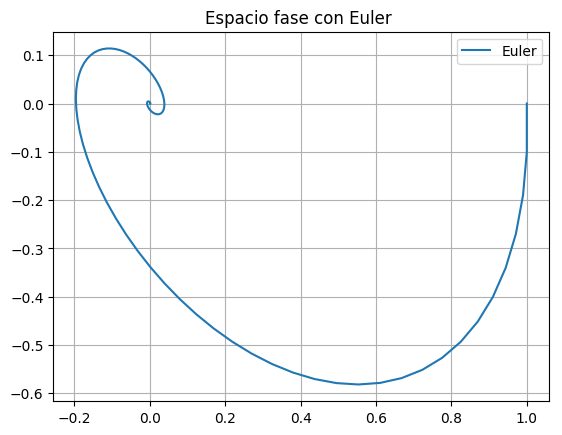

PyObject <matplotlib.legend.Legend object at 0x7fa12dbc8dd0>

In [12]:
title("Espacio fase con Euler ") #Graficamos el espacio fase con Euler.
grid("on")
plot(listx1e,listx2e, label="Euler")
legend()

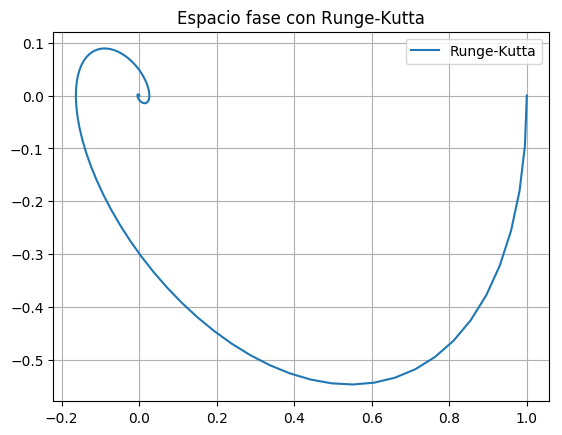

PyObject <matplotlib.legend.Legend object at 0x7fa1313d0c90>

In [13]:
title("Espacio fase con Runge-Kutta") #Graficamos el espacio fase con Runge-Kutta.
grid("on")
plot(listx1RK,listx2RK, label="Runge-Kutta")
legend()

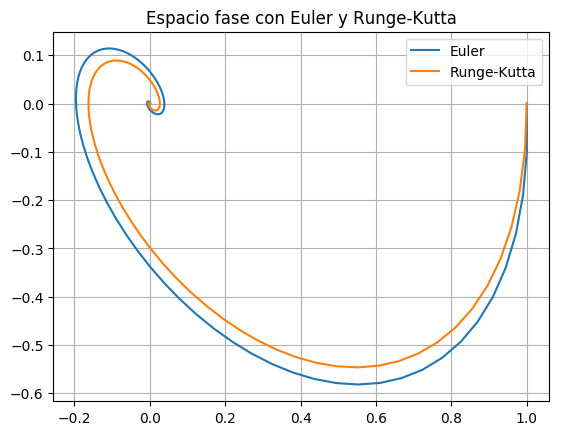

PyObject <matplotlib.legend.Legend object at 0x7fa12d9af250>

In [15]:
title("Espacio fase con Euler y Runge-Kutta") #Graficamos ambas resultados.
grid("on")
plot(listx1e,listx2e, label="Euler")
plot(listx1RK,listx2RK, label="Runge-Kutta")
legend()

__Ejercicio 2: Resolver el péndulo simple__
$$l \ddot\theta=-g \sin(\theta),$$
usando Runge-Kutta orden 4. Gráficar muchas condiciones iniciales (lo mas facil es que sean aleatorias) en el espacio de fase usando $l=g=1$. Ajuste el rango de la gráfica para que se centre cerca del cero para que se puedan observar los dos tipos de movimiento presentes. Coménte e interprete las soluciones.

In [3]:
h(x,t)=[x[2], -sin(x[1])] #Definimos la función con l=1 y g=1.

h (generic function with 1 method)

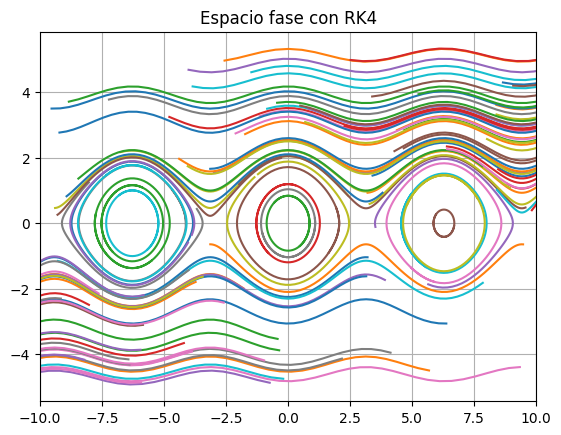

(-10,10)

In [23]:
title("Espacio fase con RK4") #Espacio fase para varias condiciones iniciales con Runge-Kutta.
grid("on")
list=0:0.1:10 #Se usa el intervalo [0,15] con h = 0.1.

for i in 1:100 #Entre más condiciones iniciales hagamos más aparecerá el espacio fase teórico.
    a=10*(2*rand(1)-1) #Tomamos valores aleatorios entre el [-3,3].
    b=5*(2*rand(1)-1)
    
    vec=rungeKutta(h,list,[a,b]) #Se aplica Runge-Kutta y se guarda en dos lists.
    listx1rk=map(x->x[1],vec)
    listx2rk=map(x->x[2],vec)
    plot(listx1rk,listx2rk)
end
xlim(-10,10)

__Ejercicio 3: Comprobar numéricamente (con Runge-Kutta orden $4$) que en el sistema:
$$\frac{dx}{dt}=x^2-1,$$
hay dos _puntos fijos_, ubicados en $1$ y $-1$, compruebe además que el $1$ es un _repulsor_ y el $-1$ un _atractor_.__

Para hacer esto necesitará graficar muchas condiciones iniciales, generelas aleatoriamente y gráfiquelas en el espacio $(x(t),t)$.

In [25]:
g(x,t)=x^2-1 #Definimos la funcion dx/dt.

g (generic function with 1 method)

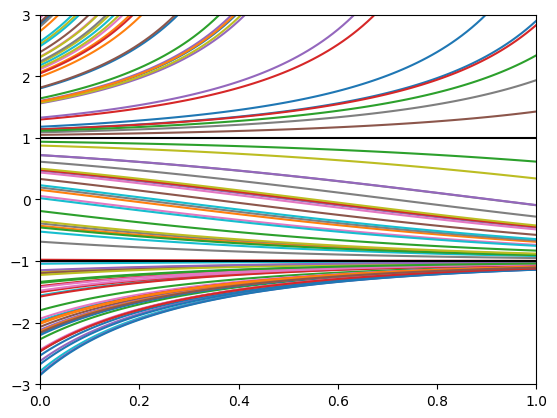

(-3,3)

In [67]:
listt=0:0.01:1
for i in 1:100
    a=3*(2*rand()-1)
    b=rungeKutta(g,listt,a)
    plot(listt,b)
end
plot([0,1],[1,1],color="k") #Aqui pintamos la recta el 1 y -1, que son los puntos a donde se alejan y acercan las lineas.
plot([0,1],[-1,-1],color="k")
axes()[:set_xlim]([0,1])
axes()[:set_ylim]([-3,3])

Podemos ver como las lineas se van juntando en el punto -1 y se van alejando en el punto 1.

__Ejercicio 4: También con Runge-Kutta orden $4, $Resuelva numéricamente el sistema__
$$\frac{dx}{dt}=x^2,$$
cual es el punto fijo único?, es un _atractor_ o un _repulsor_?. Utilice de igual forma muchas condiciones iniciales y gráfiquelas en el mismo espacio que en el ejercicio anterior.

In [54]:
k(x,t)=x^2 #Definimos la función.

k (generic function with 1 method)

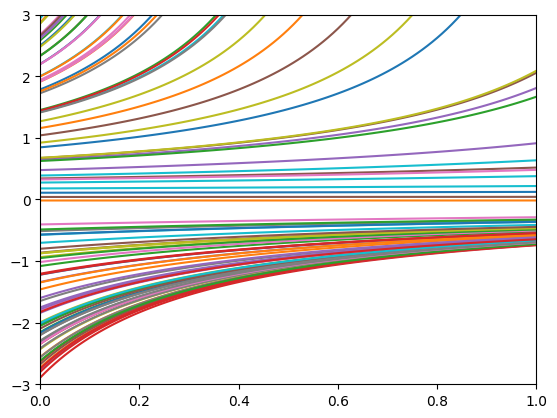

(-3,3)

In [58]:
for i in 1:100
    a=3*(2*rand()-1)
    b=rungeKutta(k,listt,a)
    plot(listt,b)
end
axes()[:set_xlim]([0,1])
axes()[:set_ylim]([-3,3])

Podemos ver que el punto donde se acercan las lineas es el 0, pero por el otro lado tambien se están alejando. Entoces el recorrido que se hará dependerará de donde se tome el punto inicial.

__Ejercicio 5: Resolver con Runge-Kutta orden $4$ el sistema de ecuaciones:__
$$\frac{d\vec x}{dt}=\left(\begin{array}{cc} a & b \\ c & d \end{array}\right)\vec x,$$
donde $\vec x= \left(x(t),y(t)\right)^{\text{T}}.$
Grafique los espacios de fase tomando muchas condiciones iniciales aleatorias y fijando los rangos de los ejes alrededor del origen, de tal forma que se aprecie el compotamiento de las soluciones. Haga esto para los sistemas con:
* $a=b=1$, $c=d=0$
* $a=b=-1$, $c=d=0$
* $a=1$, $b=-2$, $c=d=0$
* $a=1$, $b=-0.5$, $c=d=0$
* $a=d=0$, $b=-c=1$
* $a=d=1$, $b=-c=1$
* $a=d=-1$, $b=-c=1$
* $a=d=-1$, $b=-c=-1$
* $a=b=1$, $b=4,c=-2$
* $a=b=d=-1$, $c=0$

In [72]:
A(a,b,c,d,x,t)=[a*x[1]+b*x[2],c*x[1]+d*x[2]] #Definimos el arreglo de la matriz a resolver y un intervalo de tiempo.
listt=0:0.1:10

0.0:0.1:10.0

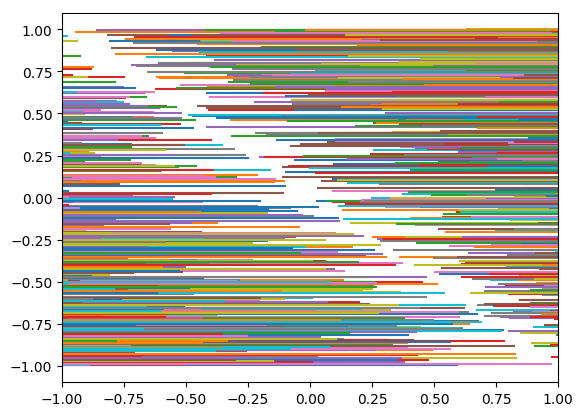

(-1,1)

In [78]:
A1(x,t)=A(1,1,0,0,x,t) #Aplicamos las condiciones iniciales de cada inciso.
for i in 1:1000
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    listx=map(x->x[1],rungeKutta(A1,listt,[x0,y0]))
    listy=map(x->x[2],rungeKutta(A1,listt,[x0,y0]))
    
    plot(listx,listy)
end
xlim(-1,1)

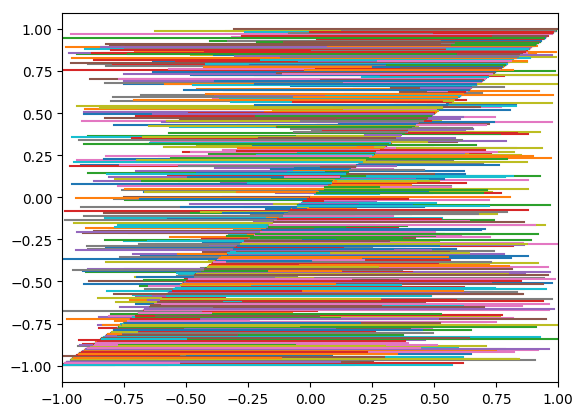

(-1,1)

In [81]:
A2(x,t)=A(-1,1,0,0,x,t)
for i in 1:1000
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    listx=map(x->x[1],rungeKutta(A2,listt,[x0,y0]))
    listy=map(x->x[2],rungeKutta(A2,listt,[x0,y0]))
    
    plot(listx,listy)
end
xlim(-1,1)

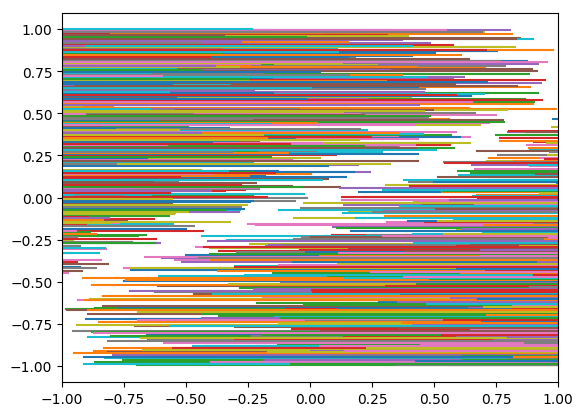

(-1,1)

In [82]:
A3(x,t)=A(1,-2,0,0,x,t)
for i in 1:1000
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    listx=map(x->x[1],rungeKutta(A3,listt,[x0,y0]))
    listy=map(x->x[2],rungeKutta(A3,listt,[x0,y0]))
    
    plot(listx,listy)
end
xlim(-1,1)

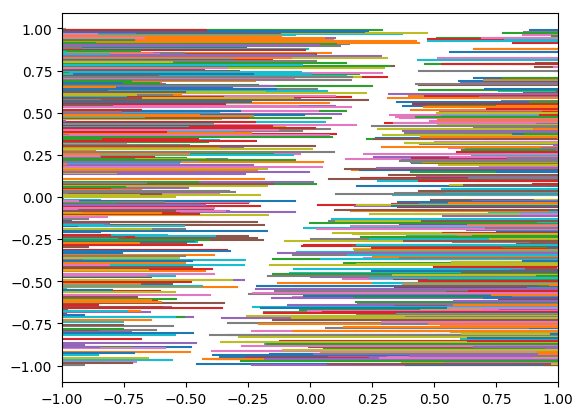

(-1,1)

In [83]:
A4(x,t)=A(1,-0.5,0,0,x,t)
for i in 1:1000
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    listx=map(x->x[1],rungeKutta(A4,listt,[x0,y0]))
    listy=map(x->x[2],rungeKutta(A4,listt,[x0,y0]))
    
    plot(listx,listy)
end
xlim(-1,1)

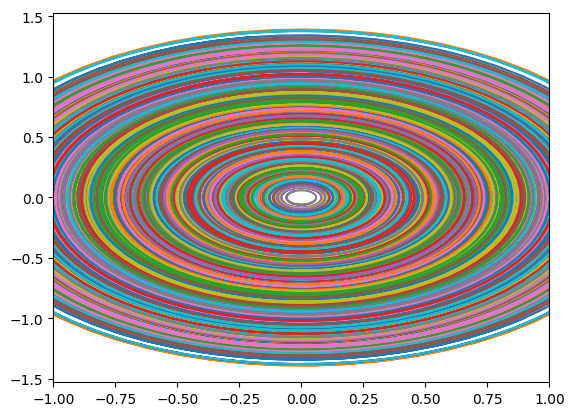

(-1,1)

In [84]:
A5(x,t)=A(0,1,-1,0,x,t)
for i in 1:1000
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    listx=map(x->x[1],rungeKutta(A5,listt,[x0,y0]))
    listy=map(x->x[2],rungeKutta(A5,listt,[x0,y0]))
    
    plot(listx,listy)
end
xlim(-1,1)

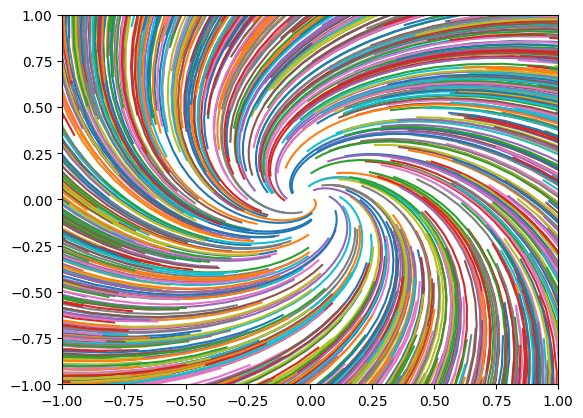

(-1,1)

In [95]:
A6(x,t)=A(1,1,-1,1,x,t)
for i in 1:1000
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    listx=map(x->x[1],rungeKutta(A6,listt,[x0,y0]))
    listy=map(x->x[2],rungeKutta(A6,listt,[x0,y0]))
    
    plot(listx,listy)
end
xlim(-1,1)
axes()[:set_xlim]([-1,1])
axes()[:set_ylim]([-1,1])

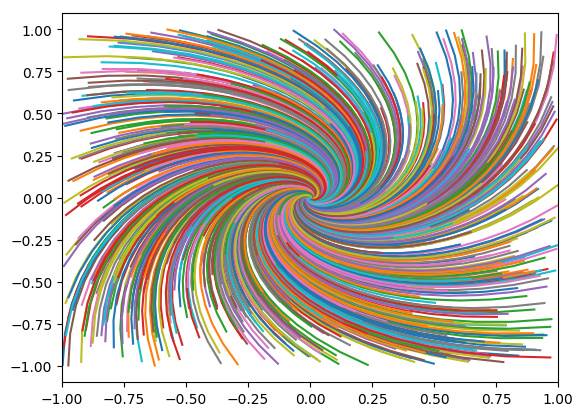

(-1,1)

In [87]:
A7(x,t)=A(-1,1,-1,-1,x,t)
for i in 1:1000
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    listx=map(x->x[1],rungeKutta(A7,listt,[x0,y0]))
    listy=map(x->x[2],rungeKutta(A7,listt,[x0,y0]))
    
    plot(listx,listy)
end
xlim(-1,1)

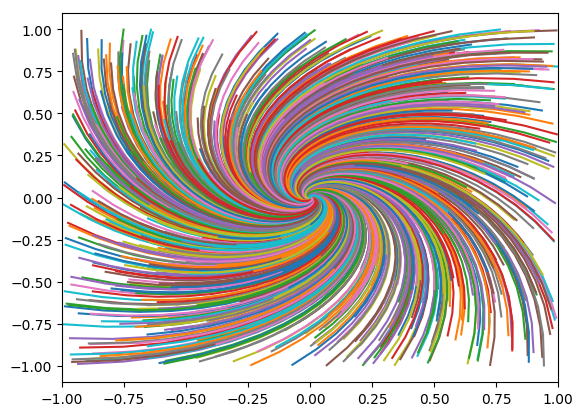

(-1,1)

In [89]:
A8(x,t)=A(-1,-1,1,-1,x,t)
for i in 1:1000
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    listx=map(x->x[1],rungeKutta(A8,listt,[x0,y0]))
    listy=map(x->x[2],rungeKutta(A8,listt,[x0,y0]))
    
    plot(listx,listy)
end
xlim(-1,1)

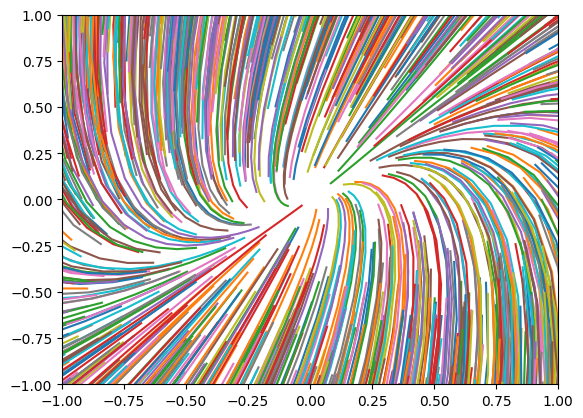

(-1,1)

In [94]:
A9(x,t)=A(1,1,-2,4,x,t)
for i in 1:1000
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    listx=map(x->x[1],rungeKutta(A9,listt,[x0,y0]))
    listy=map(x->x[2],rungeKutta(A9,listt,[x0,y0]))
    
    plot(listx,listy)
end
xlim(-1,1)
axes()[:set_xlim]([-1,1])
axes()[:set_ylim]([-1,1])

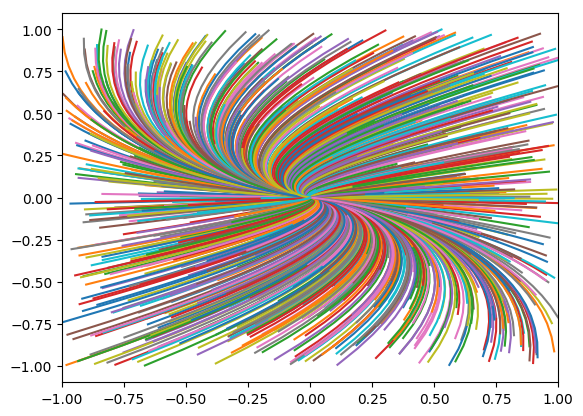

(-1,1)

In [92]:
A10(x,t)=A(-1,-1,0,-1,x,t)
for i in 1:1000
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    listx=map(x->x[1],rungeKutta(A10,listt,[x0,y0]))
    listy=map(x->x[2],rungeKutta(A10,listt,[x0,y0]))
    
    plot(listx,listy)
end
xlim(-1,1)